Importing The ImageDataGenerator Library

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator

Define the parameters/arguments for ImageDataGenerator class

In [ ]:
#Define the parameters/arguments for ImageDataGenerator class
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2,horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

Applying ImageDataGenerator functionality to trainset

In [ ]:
#Applying ImageDataGenerator functionality to trainset
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Dataset/Dataset/train_set',target_size=(128,128),batch_size=32,class_mode='binary')

Found 436 images belonging to 2 classes.


Applying ImageDataGenerator functionality to testset

In [ ]:
#Applying ImageDataGenerator functionality to testset
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Dataset/Dataset/test_set',target_size=(128,128),batch_size=32,class_mode='binary')

Found 121 images belonging to 2 classes.


Import model building libraries

In [ ]:
#To define linear initialisation import sequenial
from keras.models import Sequential
#To add layers import Dense
from keras.layers import Dense
#To create convolution kernel import convolution2D
from keras.layers import Convolution2D
#import maxpooling layer
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

Initializing the model

In [ ]:
#initializing the model
model=Sequential()

Add CNN Layer

In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Flatten())

Add Dense Layer

In [ ]:
model.add(Dense(150,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

Configure the learning process

In [ ]:
#configure the learning process
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

Train the model

In [ ]:
model.fit_generator(x_train,steps_per_epoch=14,epochs=10,validation_data=x_test,validation_steps=4)

Epoch 1/10
14/14 [==============================] - 154s 12s/step - loss: 3.9875 - accuracy: 0.5734 - val_loss: 0.3284 - val_accuracy: 0.9008
Epoch 2/10
14/14 [==============================] - 31s 2s/step - loss: 0.4792 - accuracy: 0.7615 - val_loss: 0.1603 - val_accuracy: 0.9504
Epoch 3/10
14/14 [==============================] - 29s 2s/step - loss: 0.3193 - accuracy: 0.8647 - val_loss: 0.1261 - val_accuracy: 0.9669
Epoch 4/10
14/14 [==============================] - 31s 2s/step - loss: 0.2223 - accuracy: 0.9151 - val_loss: 0.1062 - val_accuracy: 0.9669
Epoch 5/10
14/14 [==============================] - 29s 2s/step - loss: 0.1956 - accuracy: 0.9220 - val_loss: 0.0915 - val_accuracy: 0.9669
Epoch 6/10
14/14 [==============================] - 30s 2s/step - loss: 0.1878 - accuracy: 0.9220 - val_loss: 0.0700 - val_accuracy: 0.9917
Epoch 7/10
14/14 [==============================] - 30s 2s/step - loss: 0.1782 - accuracy: 0.9243 - val_loss: 0.0668 - val_accuracy: 0.9835
Epoch 8/10
14/14 [

Save The Model

In [ ]:
model.save("forest1.h5")

Predictions

In [ ]:
from keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

In [ ]:
model = load_model("forest1.h5")

In [ ]:
img=image.load_img('/content/drive/MyDrive/Dataset/Dataset/Dataset/test_set/with fire/header_hypermaritime_fire.jpg')
x=image.img_to_array(img)
res = cv2.resize(x, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
x=np.expand_dims(res,axis=0)

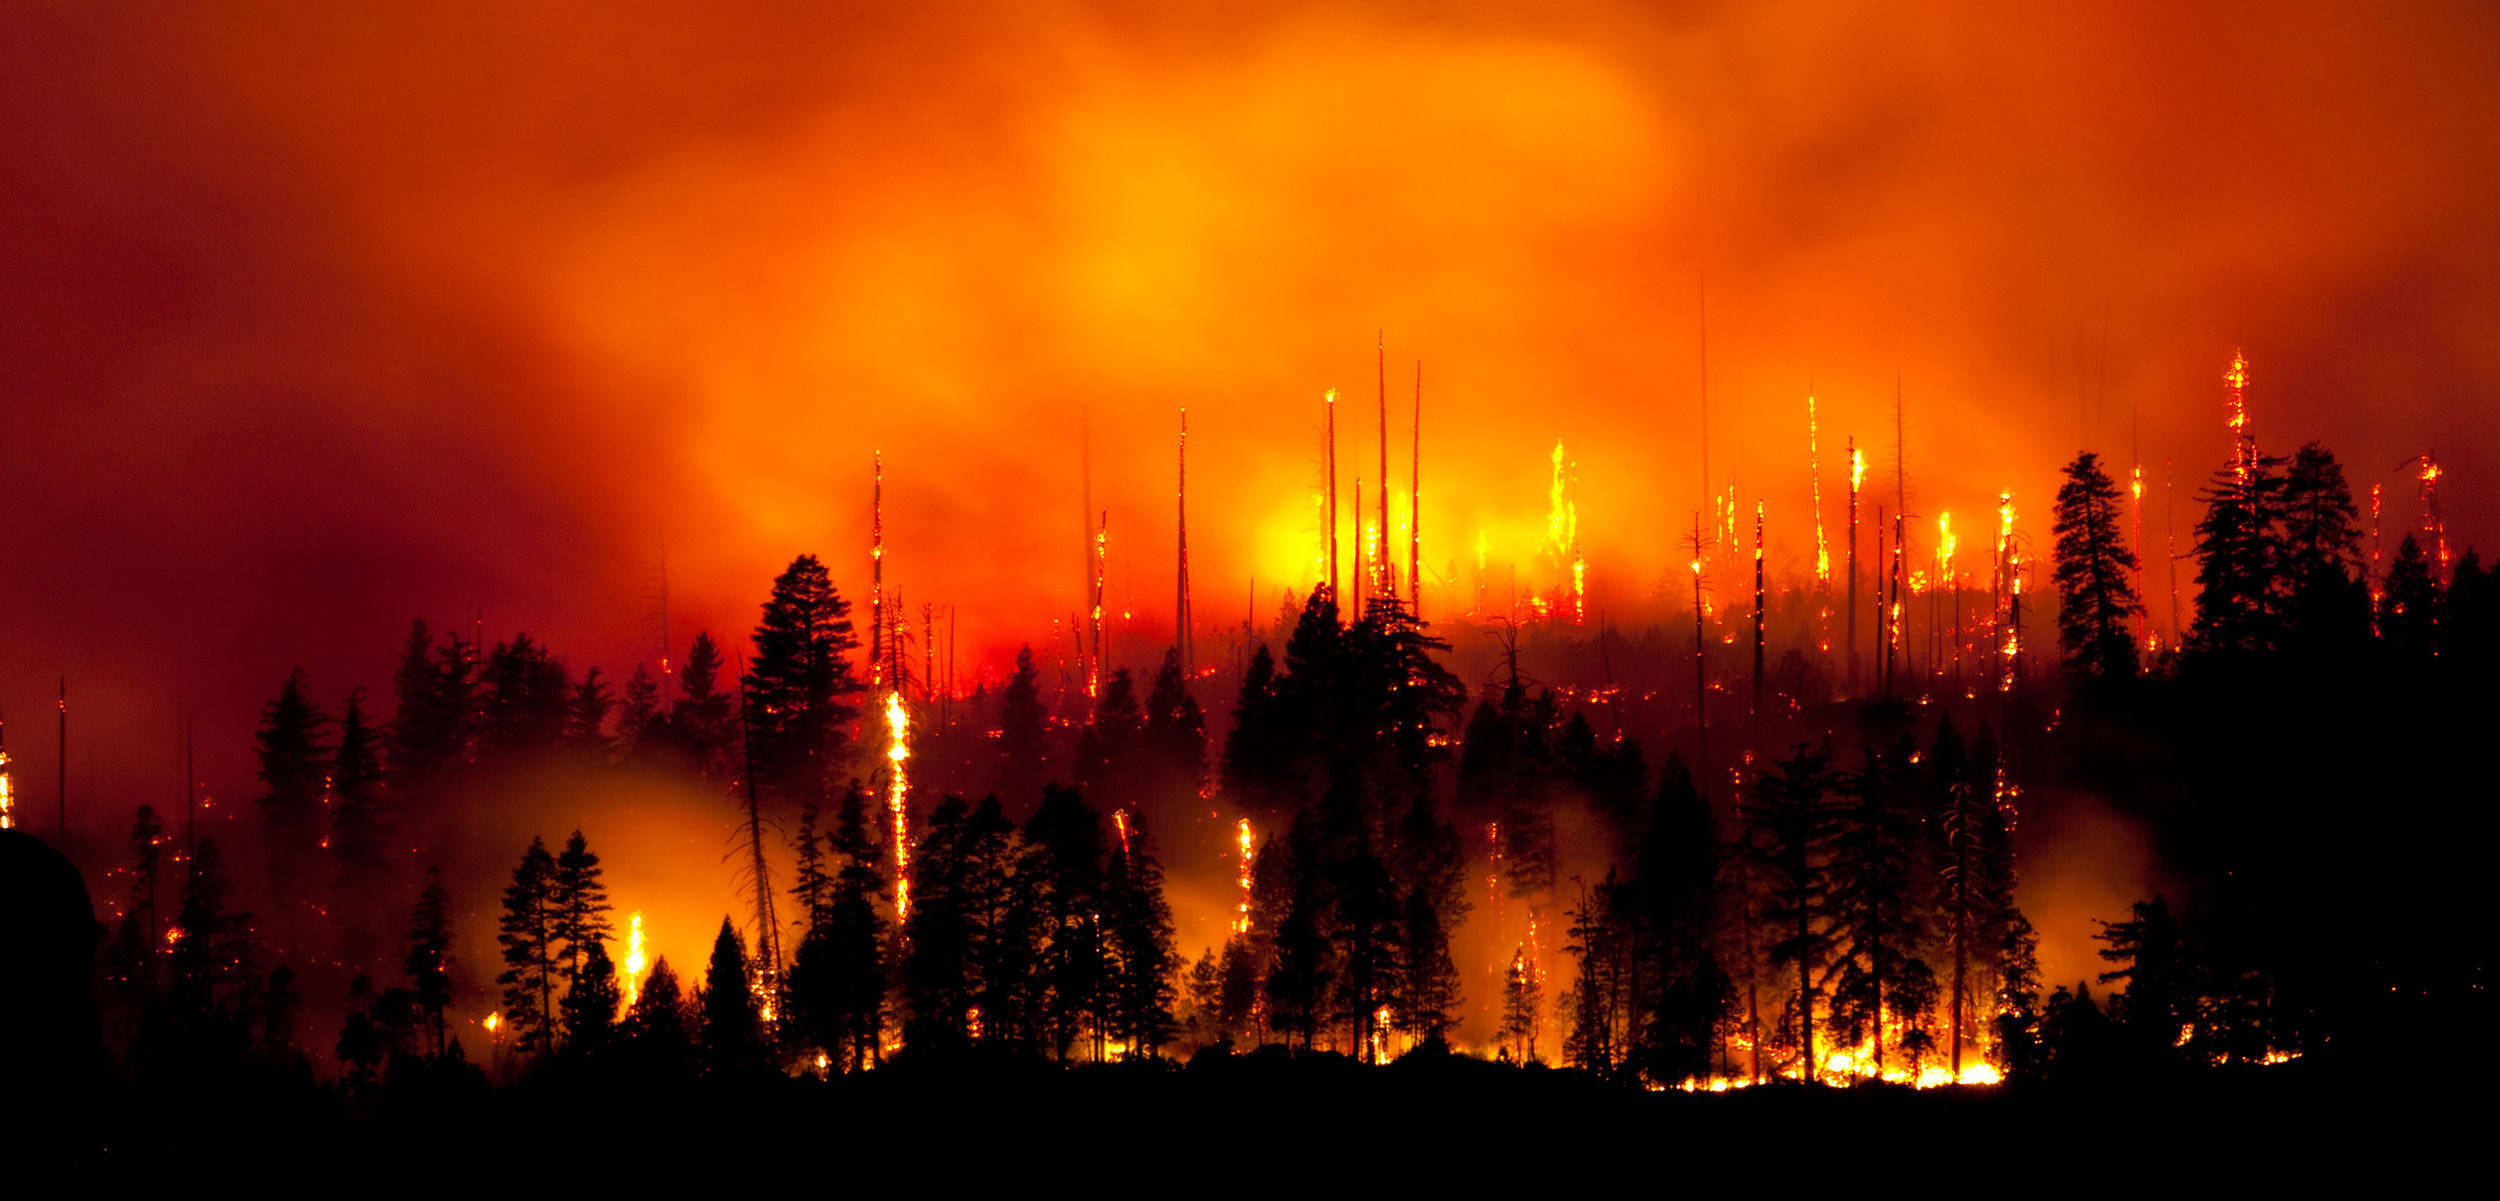

In [ ]:
img

In [ ]:
pred=model.predict(x)

1/1 [==============================] - 0s 200ms/step


In [ ]:
pred

array([[1.]], dtype=float32)